In [1]:
train_test_split=0.8
Num_sources=5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pre_process(data=train_data):
    result=[]
    for source in range(Num_sources):
        train_data_x=[]
        train_data_y=[]
        for item in data:
            x,y=item
            train_data_x.append(x/np.sum(x))
            train_data_y.append(y[source]/np.sum(y))
        result.append((train_data_x,train_data_y))
    return result
        
data=pd.read_csv("data/real_world/Source_Contribution.csv")
data.head()

NameError: name 'train_data' is not defined

In [6]:
# train_data=data[:int(len(data)*train_test_split)]
# test_data=data[int(len(data)*train_test_split):]

In [ ]:
# size_3=train_data["0.3"]
# size_5=train_data["0.5"]
# size_10=train_data["1"]
# size_25=train_data["2.5"]

In [7]:
# k=data.get("0.3","2.5")

In [4]:
train_data=[]
for item in data.values:
    y=np.array(item[:Num_sources])
    x=item[Num_sources+1:]
    train_data.append((x,y))


In [5]:
from sklearn import linear_model 
from sklearn import svm
model=[]
for source in range(Num_sources):
    train_data_x=[]
    train_data_y=[]
    for item in train_data:
        x,y=item
        train_data_x.append(x)
        train_data_y.append(y[source])
    train_data_x=np.array(train_data_x)
#     train_data_x
#     train_data_y=np.array(train_data_y)
#     reg = linear_model.Ridge(alpha=0.01)
    reg = svm.SVR(kernel="rbf",gamma=0.4)
    reg.fit(train_data_x, train_data_y)
    model.append(reg)
    print("souce number:",source+1)
#     print(reg.coef_)
    print(reg.score(train_data_x, train_data_y))

souce number: 1
0.34464534405644454
souce number: 2
-0.02821483377414613
souce number: 3
0.327048818025352
souce number: 4
0.028277086710453037
souce number: 5
0.12107914971569966


In [72]:
y=train_data_y

In [73]:
y_pred=reg.predict(train_data_x)

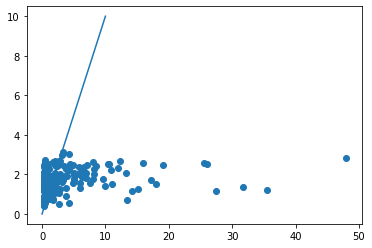

In [76]:
plt.scatter(y,y_pred)
plt.plot([0,10],[0,10])

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

grid_values = {'gamma':[0.001,.009,0.01,.09,1,5,10,25]}

for source in range(Num_sources):
    train_data_x=[]
    train_data_y=[]
    for item in train_data:
        x,y=item
        train_data_x.append(x)
        train_data_y.append(y[source])
    train_data_x=np.array(train_data_x)
#     train_data_x
#     train_data_y=np.array(train_data_y)
#     reg = linear_model.Ridge(alpha=0.01)
    reg = svm.SVR(kernel="rbf")
    
    
    grid_clf_acc = GridSearchCV(reg , param_grid = grid_values,scoring = 'accuracy')
    grid_clf_acc.fit(train_data_x, train_data_y)
    
    
#     reg.fit(train_data_x, train_data_y)
#     model.append(reg)
    print("souce number:",source+1)
#     print(reg.coef_)
#     print(reg.score(train_data_x, train_data_y))

d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-pack

souce number: 1
souce number: 2


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-pack

souce number: 3
souce number: 4


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-pack

souce number: 5


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "d:\users\dell\appdata\local\programs\python\python36\lib\site-pack

In [108]:
from sklearn.datasets import load_iris
from sklearn import svm

import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target

k=['rbf', 'linear','poly','sigmoid']
c= range(1,2)
g=np.arange(1e-4,1e-2,0.001)
g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g)
print(param_grid)
svr=svm.SVC()
grid = GridSearchCV(svr, param_grid, cv=5,scoring='accuracy')
grid.fit(X, y)  
print()
# print("Grid scores on development set:")
# print()  
# print(grid.cv_results_)  
print("Best parameters set found on development set:")
print("\n")
print(grid.best_params_)
print("Grid best score:")
print()
print (grid.best_score_)
# create a list of the mean scores only
# grid_mean_scores = [result.mean_validation_score for result in grid.cv_results_]
# print(grid_mean_scores)

{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': range(1, 2), 'gamma': [0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071, 0.0081, 0.0091]}

Best parameters set found on development set:


{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Grid best score:

0.9800000000000001


In [105]:
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(1, 2),
                         'gamma': [0.0001, 0.0011, 0.0021, 0.0031, 0.0041,
                                   0.0051, 0.0061, 0.0071, 0.0081, 0.0091],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [6]:
# limits=[57.47183824,7506.011319,2206.483958,479.1307639,48.02180556]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
model=[]




k=['rbf', 'linear','sigmoid','poly']
c=[0.001,0.01,0.1,1]
g=[0.01,0.1,1,10]
d=[6,7,8,9]
r=[1,2,3,4,5]
# g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g,degree=d,coef0=r)

print(param_grid)

pre_prcs_data=pre_process()

for source in range(1,Num_sources):
    print("souce number:",source+1)
    
    train_data_x,train_data_y=pre_prcs_data[source]
    train_data_x=np.array(train_data_x)
#     train_data_x
#     train_data_y=np.array(train_data_y)
#     reg = linear_model.Ridge(alpha=0.01)
    print("building regressor")
    reg = svm.SVR()
    grid = GridSearchCV(reg, param_grid, cv=3,scoring="r2",verbose=1)
    print("Hyper Parameter tuning")
    grid.fit(train_data_x, train_data_y) 
    
    print("Best parameters")
    print("\n")
    print(grid.best_params_)
    print("Grid best score:")
    print()
    print (grid.best_score_)
    model.append(grid)

#     print(reg.coef_)
#     print(reg.score(train_data_x, train_data_y))

{'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1, 10], 'degree': [6, 7, 8, 9], 'coef0': [1, 2, 3, 4, 5]}
souce number: 2
building regressor
Hyper Parameter tuning
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


In [20]:
{'C': 1, 'coef0': 4, 'degree': 7, 'gamma': 0.1, 'kernel': 'poly'}

hi


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=1)
mlp_model=[]
pre_prcs_data=pre_process()

for source in range(Num_sources):
    train_data_x,train_data_y=pre_prcs_data[source]
    train_data_x=np.array(train_data_x)
    reg = MLPRegressor(max_iter=500,solver="lbfgs", warm_start=True).fit(train_data_x, train_data_y)
    print(reg.score(train_data_x, train_data_y))
    mlp_model.append(reg)

0.0054579056113036595
0.04616220040556929
0.017480213435147274
0.007282397353808867
0.10237186082234628


In [102]:
from sklearn.linear_model import SGDRegressor


sgd_model=[]
pre_prcs_data=pre_process()

for source in range(Num_sources):
    train_data_x,train_data_y=pre_prcs_data[source]
    train_data_x=np.array(train_data_x)
    reg = SGDRegressor(max_iter=1000000, tol=1e-8,warm_start=True,learning_rate="adaptive")
    reg.fit(train_data_x, train_data_y)
    print(reg.score(train_data_x, train_data_y))
    sgd_model.append(reg)

-0.00029802528291567043
0.000853187440834513
-0.0005310025750802083
-0.00027533203323848454
0.00048070394488808343


In [120]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared

gp_model=[]
pre_prcs_data=pre_process()
kernel = DotProduct() + WhiteKernel() + RationalQuadratic()

for source in range(Num_sources):
    train_data_x,train_data_y=pre_prcs_data[source]
    train_data_x=np.array(train_data_x)
    reg = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(train_data_x, train_data_y)
    print(reg.score(train_data_x, train_data_y))
    gp_model.append(reg)


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


0.0010895170840071744
0.034856124205096095


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


0.019111431978143578


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


0.004006717330279019
0.004704320595450784


In [127]:
from sklearn import tree
tree_model=[]
pre_prcs_data=pre_process()

for source in range(Num_sources):
    train_data_x,train_data_y=pre_prcs_data[source]
    train_data_x=np.array(train_data_x)
    test_data_x=train_data_x[150:]
    test_data_y=train_data_y[150:]
    train_data_y=train_data_y[:150]
    train_data_x=train_data_x[:150]
    reg = tree.DecisionTreeRegressor().fit(train_data_x, train_data_y)
    print(reg.score(train_data_x, train_data_y))
    tree_model.append(reg)

1.0
1.0
1.0
1.0
1.0


In [157]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

gb_model=[]
pre_prcs_data=pre_process()

for source in range(Num_sources):
    train_data_x,train_data_y=pre_prcs_data[source]
    train_data_x,train_data_y=shuffle(train_data_x,train_data_y)
    train_data_x=np.array(train_data_x)
    test_data_x=train_data_x[150:]
    test_data_y=train_data_y[150:]
    train_data_y=train_data_y[:150]
    train_data_x=train_data_x[:150]
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(train_data_x, train_data_y)
    print(reg.score(test_data_x, test_data_y))
    gb_model.append(reg)




-0.7645986931240796
-0.48970917866448427
-0.2427779630063709
-0.09176586711516
-0.12003138697986793


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

gb_model=[]
pre_prcs_data=pre_process()


X=data[["PM2.5", "0.3", "0.5", "1", "2.5"]].values
Y=data[["S1","S2","S3","S4","S5"]].values   

X,Y=shuffle(X,Y)

reg = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
reg.fit(X[:150],Y[:150])
print("trained data, R2:",reg.score(X[:150],Y[:150]))
print("unseen data, R2:",reg.score(X[150:],Y[150:]))
# gb_model.append(reg)



trained data, R2: 0.92889963146862
unseen data, R2: -8.359309375892234


source 1


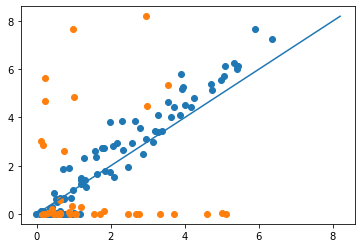

source 2


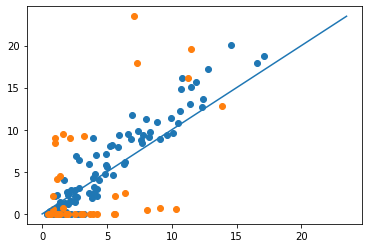

source 3


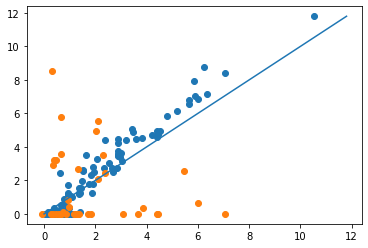

source 4


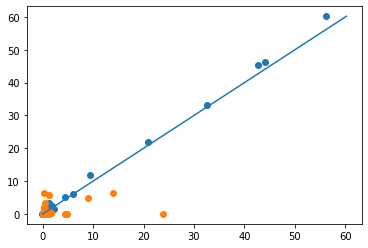

source 5


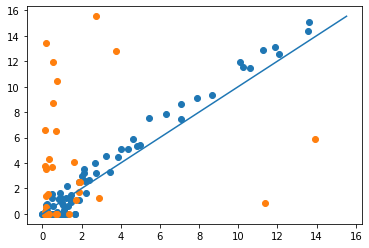

In [202]:
Y_pred=reg.predict(X)
for source in range(Num_sources):
    x=[]
    y=[]
    print("source",source+1)
    for item in range(len(Y_pred)):
        x.append(Y_pred[item][source])
        y.append(Y[item][source])
    plt.scatter(x[:150],y[:150])
    plt.scatter(x[150:],y[150:])
    plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)])
    plt.show()

array([[ 2.58560439e-01,  1.67262682e+01,  9.58685604e-02,
         3.92004675e-01,  1.43827602e-01],
       [ 4.00113331e-01,  5.44912618e-01,  5.48161840e+00,
         3.94996491e-01,  2.11778544e-01],
       [ 4.27901373e+00,  1.89471531e+00,  7.25718675e-01,
         3.39892997e-01,  4.65495222e-01],
       [ 6.68833266e+00,  1.86418372e+00,  5.40420570e-01,
         2.41135343e-01,  9.22714310e+00],
       [ 1.35454342e-01,  5.08863993e+00,  8.97478949e-01,
         7.28671768e-01,  1.43827602e-01],
       [ 3.39464895e-01,  1.29429710e+01,  7.25718675e-01,
         3.39892997e-01,  7.11831496e-01],
       [ 1.72320365e+00,  1.24589697e+00,  3.85595325e-01,
         3.94996491e-01,  1.90180301e-02],
       [ 3.64207246e-01,  1.35003254e+01,  4.84606588e-01,
         9.18596612e-01,  2.98688623e-01],
       [ 4.58610033e+00,  8.22840078e-01,  4.19925622e-01,
         3.62810539e-01,  1.16188422e+00],
       [ 4.73618942e-01,  1.34318495e+01,  5.84806663e-01,
         2.12825457e+00

In [156]:
# from sklearn.isotonic import IsotonicRegression

# gp_model=[]
# pre_prcs_data=pre_process()
# kernel = DotProduct() + WhiteKernel() + RationalQuadratic()

# for source in range(Num_sources):
#     train_data_x,train_data_y=pre_prcs_data[source]
#     train_data_x=np.array(train_data_x)
#     reg = IsotonicRegression().fit(train_data_x, train_data_y)

#     print(reg.score(train_data_x, train_data_y))
#     gp_model.append(reg)

array([[7.24767082e-01, 2.20861894e-01, 4.92662396e-02, 5.10478476e-03],
       [7.69550189e-01, 2.11363692e-01, 1.63386734e-02, 2.74744548e-03],
       [7.67043133e-01, 2.13755699e-01, 1.73517898e-02, 1.84937837e-03],
       [7.42971902e-01, 2.07623907e-01, 3.34245151e-02, 1.59796754e-02],
       [7.69309640e-01, 2.11281185e-01, 1.62780435e-02, 3.13113095e-03],
       [7.67502557e-01, 2.12615532e-01, 1.73963588e-02, 2.48555235e-03],
       [7.69000086e-01, 2.13437561e-01, 1.59352740e-02, 1.62707841e-03],
       [7.62524910e-01, 2.07028353e-01, 2.11147250e-02, 9.33201195e-03],
       [7.70574155e-01, 2.11528206e-01, 1.55572730e-02, 2.34036638e-03],
       [7.72287611e-01, 2.10970645e-01, 1.46728750e-02, 2.06886821e-03],
       [7.70164377e-01, 2.14793492e-01, 1.40973612e-02, 9.44769326e-04],
       [7.61845845e-01, 2.08381231e-01, 2.21812035e-02, 7.59172111e-03],
       [7.72753424e-01, 2.09862098e-01, 1.50954972e-02, 2.28898112e-03],
       [7.72096499e-01, 2.12883875e-01, 1.34016813e

In [155]:
SAVE=False

source: 1


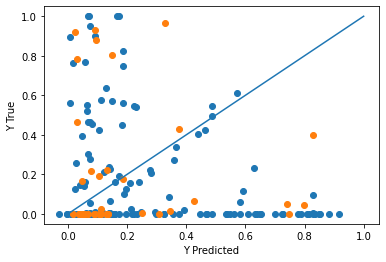

source: 2


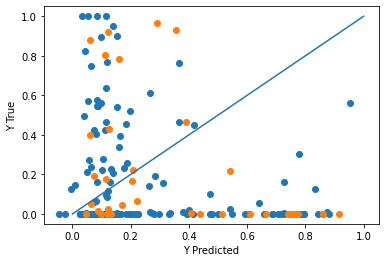

source: 3


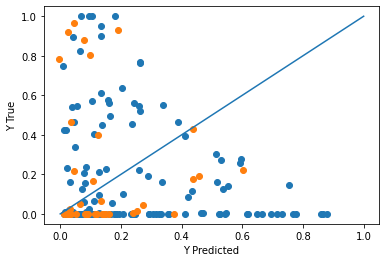

source: 4


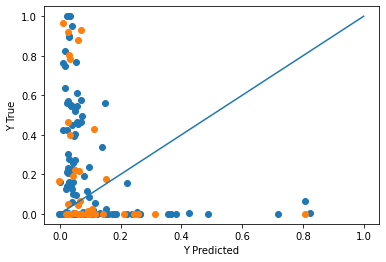

source: 5


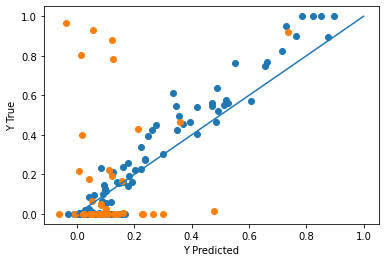

In [160]:

for n in range(Num_sources):
    print("source:",n+1)
    grid=gb_model[n]
    
    y_pred=grid.predict(train_data_x)
    plt.scatter(y_pred,train_data_y)
    y_pred=grid.predict(test_data_x)
    plt.scatter(y_pred,test_data_y)
    plt.plot([0,1],[0,1])
    plt.xlabel("Y Predicted")
    plt.ylabel("Y True")
    if SAVE:
        plt.savefig(".\pic\direct_source_"+str(n+1)+"_"+str(Num_sources)+".png",dpi=1200)
    
    plt.show()

In [128]:
grid.get_depth()

14

range(1, 3)